---
# Aggregations in Pandas
---
## 1. The Power of Aggregation:

So far we have learnt how to construct and work with Pandas Objects, perform element-wise operations and combine datasets. However, sometimes to drive a 'narrative', often times we need to step away from the detail and __look at the big picture__. Summarising, also __aggregating__ datasets enable us to do exactly this!

__Aggregation Function - Definition:__ a function that takes a collection of values and returns a single value. Examples of aggregation functions include __sum, count, mean, max, median, standard deviation, quantiles, etc__.

---
### 1.1 Aggregation on Series:
Aggregating a Series simply takes all elements of the Series as input and returns a single-valued output:

---
### 1.2 Aggregation on DataFrames:
Recall that a DataFrame is a collection of Series (each column can be seen as a Series). Performing aggregation on DataFrame is done on an axis level - column or row. Depending on the instruction, the aggregation function will return a single-valued output per column/row.

__NB:__ To obtain a suite of descriptive statistics for a DataFrame, use the `.describe()` method. Note that you can use this method on both DataFrames and Series!

__NB:__ By default, missing values (NaN) are ommitted from any aggregation calculation. Essentially, this means that blanks are excluded from the population of values, used for the derivation of the statistics.

---
## 2. Aggregation using GroupBy - Split-Apply-Combine:

Very often the DataFrames we work with contain one or multiple __categorical__ columns - columns with recurring values. The values of these columns provide us with a natural way of 'grouping' data into subsets, and analysing each subset individually. 

A __GroupBy Operation__ is an operation that involves __splitting__ the object, __applying__ a function on each sub-part, and __combining__ the results.

TODO: Get image for split-apply-combine.

In what follows, we will be using the `.groupby()` Method: 

The above code shows that we can iterate over the `df.groupby('key')` object, which effectively performs the __Splitting__ of the DataFrame.

Now, let's perform the second and third operation - __Aggregation__ and __Combination__:

---
### 2.1 GroupBy and the .agg() method:

We use the `.agg()` method in combination with the `.groupby()` method when we want to:
- Perform multiple aggregation functions on a DataFrame column
- Perform different aggregation functions across multiple DataFrame columns

Syntax:
- `df.groupby('column_name').agg([agg_fn1, agg_fn2, ...])`
- `df.groupby('column_name').agg({'column_name1':agg_fn1, 'column_name2':agg_fn2, ...})`

---
### 2.2 GroupBy and the .filter() method:

- We can use the `.filter()` method in combination with the `.groupby()` method when we want to **filter out groups with a boolean criterion**.
- The output of the operation is a combination of all groups of DataFrame rows, for which the aggregation result satisfied the boolean criterion

Syntax:
- `df.groupby('column_name').filter(boolean_aggregate_function)`

---
### 2.3 GroupBy and the .transform() method:

- We use the `.transform()` method in combination with the `.groupby()` method when we want to **join aggregate statistics back to our original DataFrame**.
- The output is the original DataFrame with an extra column, containing the aggregate statistics for each group of rows

Syntax:
- `df.groupby('column_name')[column_name1].transform(agg_function)`

---
## 3. Pivot Tables - pivot() and melt() :

- __A pivot table__ is a tool that allows us to **summarize** information from longer, narrow tables into shorter, wider tables.
- Pivotting turns the unique categorical _values_ from one column into multiple _columns_ in the output.
- The pivot table then runs an aggregation over the these new columns, and any other columns that are selected to remain in the output. 

> N.B. - This is a key concept in data analysis and something we come across quite often when working with data.

Syntax:
- `df.pivot_table(index = 'column_name1', columns = 'column_name2', values = 'column_name3', aggfunc = ....`)
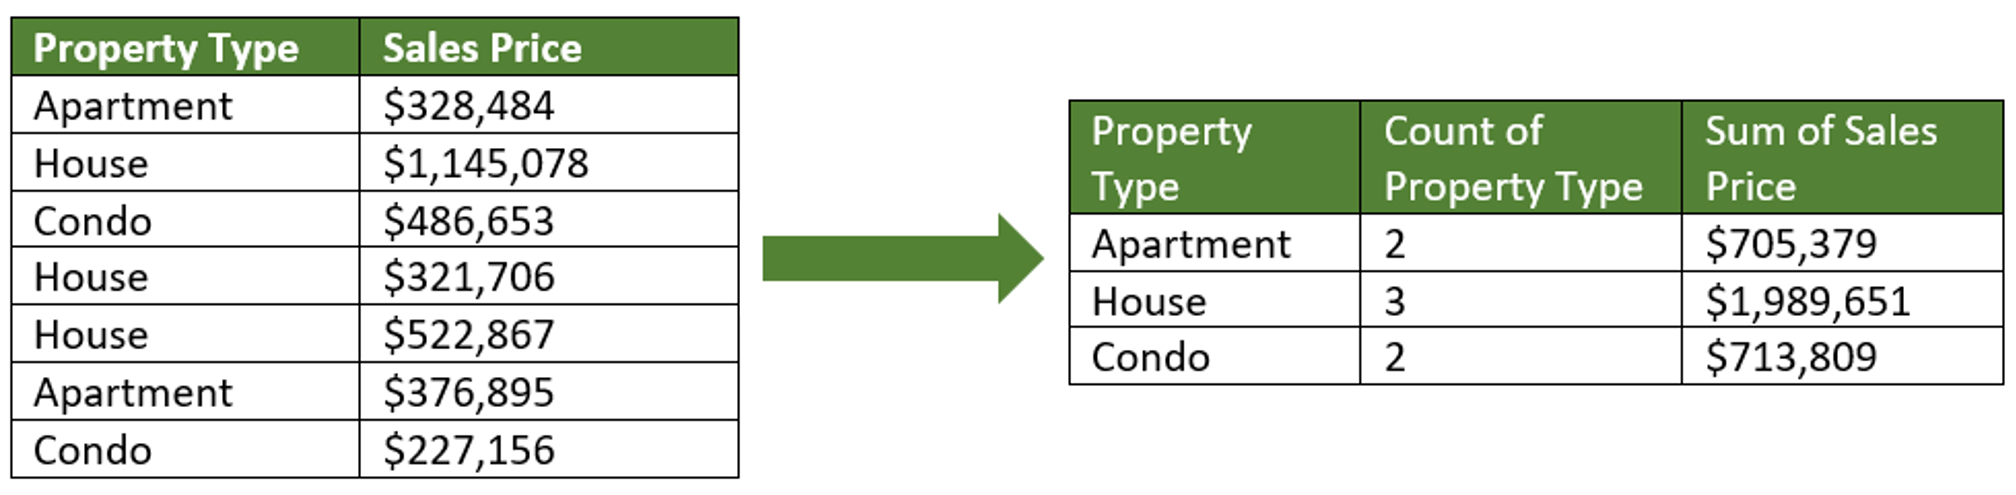

---
### 3.1 Melting a Table - melt() :

- Sometimes, it can be useful to transform the data in the opposite manner: from wide, short tables into narrow, longer tables.
- Unique column headings that belong to the same category can be used to label the data, under a new, single column heading.

> N.B. - It can be tempting to think of this as the opposite operation of pivotting, however it is important to note that you cannot undo any aggregations.
> The information has been lost and cannot be recovered.

Syntax:
- `df.melt(id_vars = 'column_name1', var_name = 'column_name2', value_name = 'column_name3')`

---
## 4. Summary:

- An __aggregation function__ is a function that takes a collection of values and returns a single summary value.
- To obtain a summary of statistics on a DataFrame, use the `.describe()` method .
- It can be useful to group the values of a categorical column together using the `.groupby()` method.
  - Use the `.agg()` method in combination with `.groupby()` to perform aggregations over the groups.
  - Use the `.filter()` method in combination with `.groupby()` to filter groups, where an aggregation of the values within the group, meet a boolean condition.
  - Use the `.transform()` methods in combination with the `.groupby()` method to join the aggregate statistics to the original DataFrame.
- The`.pivot_table()` method turns a long, narrow dataset into a shorter, wider dataset and applies an aggregation over the columns.
- The `.melt()` method turns a short, wide dataset into a longer, narrower dataset, but cannot undo any aggregations.

---
## 5. Concept Check:

1. Suppose we have the following Series: \
  `s = pd.Series([1,2,3, np.nan, np.nan, 6,7])`.
  - a. Calculate the output produced by `s.mean()`
  - b. Calculate the output produced by `s.median()`
- What can we conclude about missing values and aggregations? Do we include NaNs in the population of values used for the calculations?
1. Suppose we have the following DataFrame: \
   `df = pd.DataFrame({'Uni':['Bath', 'Warwick', 'Bristol', 'Bristol', 'Warwick', 'Bath'], 'Subject':['Maths', 'Physics', 'English', 'Maths', 'Maths', 'English'], 'Score':[78, 68, 65, 75, 82, 62]})`
  - a. Create new a DataFrame with: number of universities and average score per subject
  - b. Add a new column to the original DataFrame with the average university scores across all subjects.
  - c. Pivot the initial dataframe so that the values in 'Subject' column become column names.
  - d. Take the pivotted dataframe and return it to its original orientation using the `.melt()` method. How does this 'melted' dataframe compare to the original?